## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

COLUMNS_TO_TAKE = ["V20", "V21", "V22", "V23", "V24", "Time", "Amount", "Class"]
FEATURE_COLUMNS = ["V20", "V21", "V22", "V23", "V24"]

## Importing Data

In [4]:
df = pd.read_csv('../data/creditcard.csv')

## Exploratory Data Analysis (EDA)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Taking only five columns from V20 - V24 and Time, Amount and Class Columns from the Original Dataset

In [6]:
data_df = df[COLUMNS_TO_TAKE]
data_df.head()

,V20,V21,V22,V23,V24,Time,Amount,Class
0,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.0,149.62,0
1,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.0,2.69,0
2,0.524980,0.247998,0.771679,0.909412,-0.689281,1.0,378.66,0
3,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,1.0,123.50,0
4,0.408542,-0.009431,0.798278,-0.137458,0.141267,2.0,69.99,0


### Checking to see if there are NULL Values

In [7]:
data_df.isna().any()

V20       False
V21       False
V22       False
V23       False
V24       False
Time      False
Amount    False
Class     False
dtype: bool

### Transaction Class Distribution

Text(0, 0.5, 'Frequency')

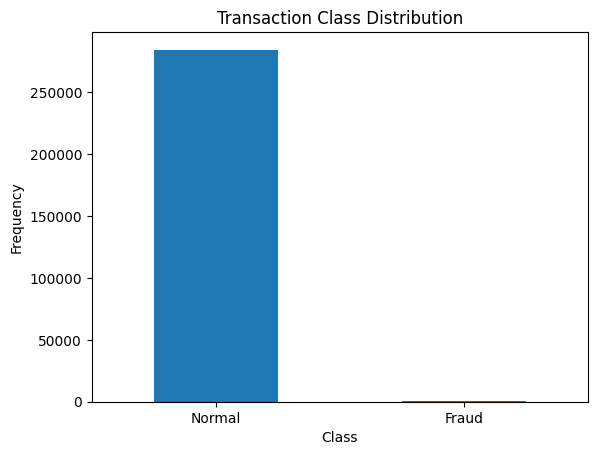

In [8]:
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(data_df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

### Determining the number of Fraud & Valid Transactions in the Dataset

In [9]:
fraud_data = data_df[data_df['Class']==1]
valid_data = data_df[data_df['Class']==0]

print(fraud_data.shape)
print(valid_data.shape)

(492, 8)
(284315, 8)


We can see that the number of fraudulant data is very low in the dataset. We can easily conclude that the dataset is heavily imbalanced.

### Analysis of Amount in case of Fraud and Valid Data

In [10]:
fraud_data.Amount.head(30)

541        0.00
623      529.00
4920     239.93
6108      59.00
6329       1.00
6331       1.00
6334       1.00
6336       1.00
6338       1.00
6427       1.00
6446       1.00
6472       1.00
6529       1.00
6609       1.00
6641       1.00
6717       1.00
6719       1.00
6734       1.00
6774       1.00
6820       1.00
6870       1.00
6882       1.10
6899       1.00
6903       1.00
6971    1809.68
8296       1.00
8312       1.00
8335       1.00
8615       1.00
8617       1.00
Name: Amount, dtype: float64

In [11]:
valid_data.Amount.head(20)

0     149.62
1       2.69
2     378.66
3     123.50
4      69.99
5       3.67
6       4.99
7      40.80
8      93.20
9       3.68
10      7.80
11      9.99
12    121.50
13     27.50
14     58.80
15     15.99
16     12.99
17      0.89
18     46.80
19      5.00
Name: Amount, dtype: float64

We can observe a distinct pattern in the 'Amount' feature between the Fraudulent and Valid transactions. In the Fraudulent data, the 'Amount' consistently shows a value of 1.00.

### Detailed Visualization of the data

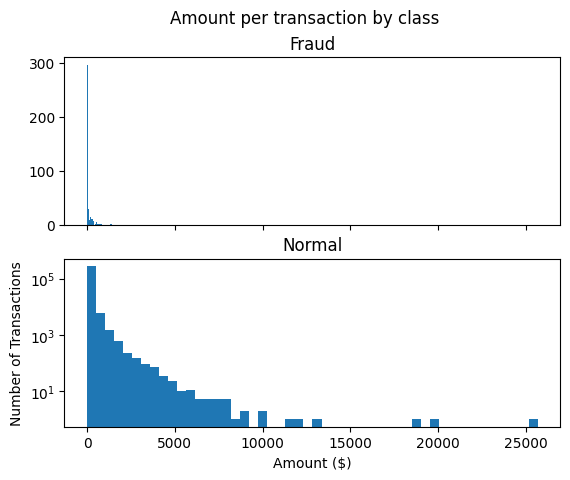

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud_data.Amount, bins = bins)
ax1.set_title('Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')

ax2.hist(valid_data.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
#plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

### Relationship of fraudulent transactions WRT Time

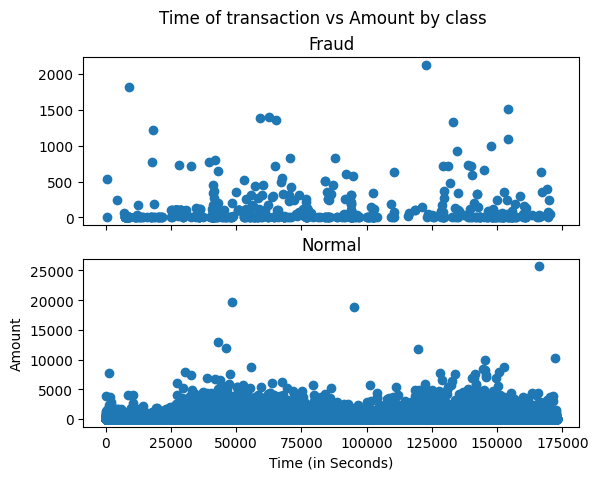

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud_data.Time, fraud_data.Amount)
ax1.set_title('Fraud')
ax2.scatter(valid_data.Time, valid_data.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

## Relationship of Time with Feature Columns

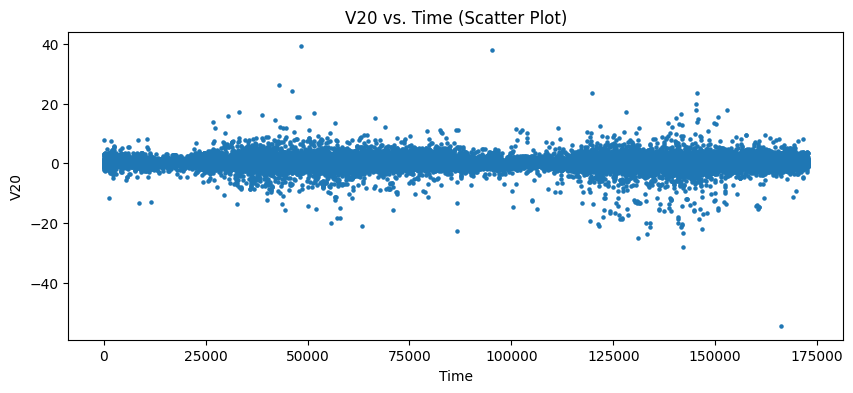

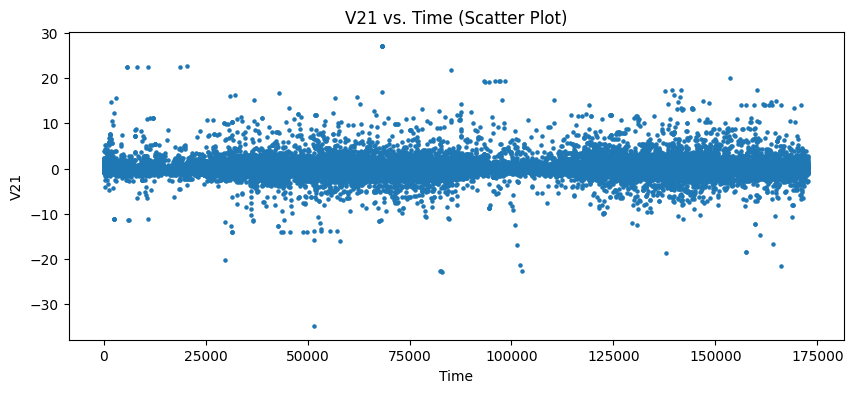

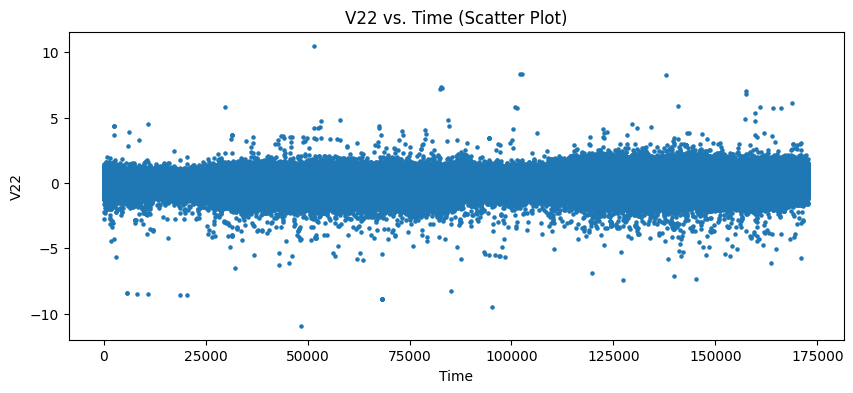

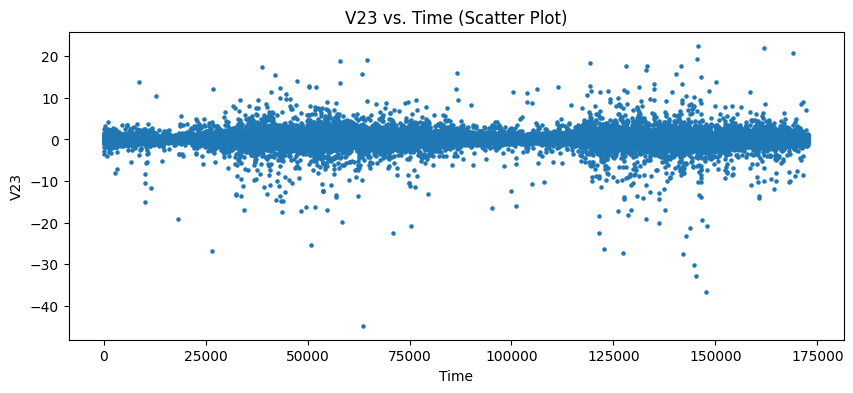

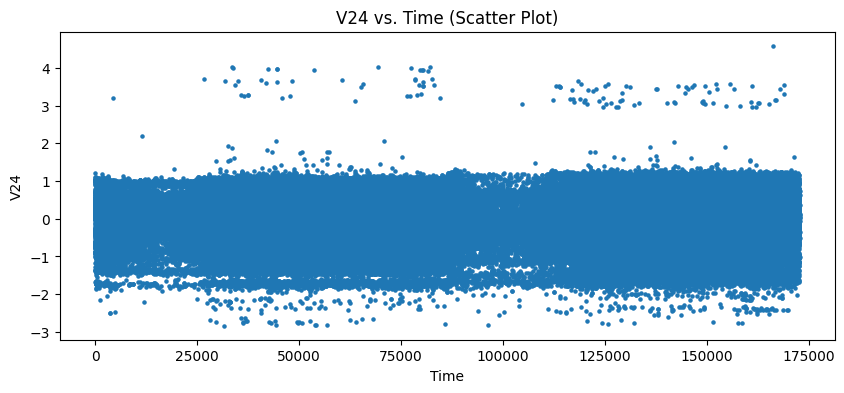

In [14]:
import matplotlib.pyplot as plt

feature_columns = columns_to_take = ["V20", "V21", "V22", "V23", "V24"]
for col in feature_columns:
    plt.figure(figsize=(10, 4))
    plt.scatter(data_df["Time"], data_df[col], s=5)  # s represents the marker size
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.title(f'{col} vs. Time (Scatter Plot)')
    plt.show()

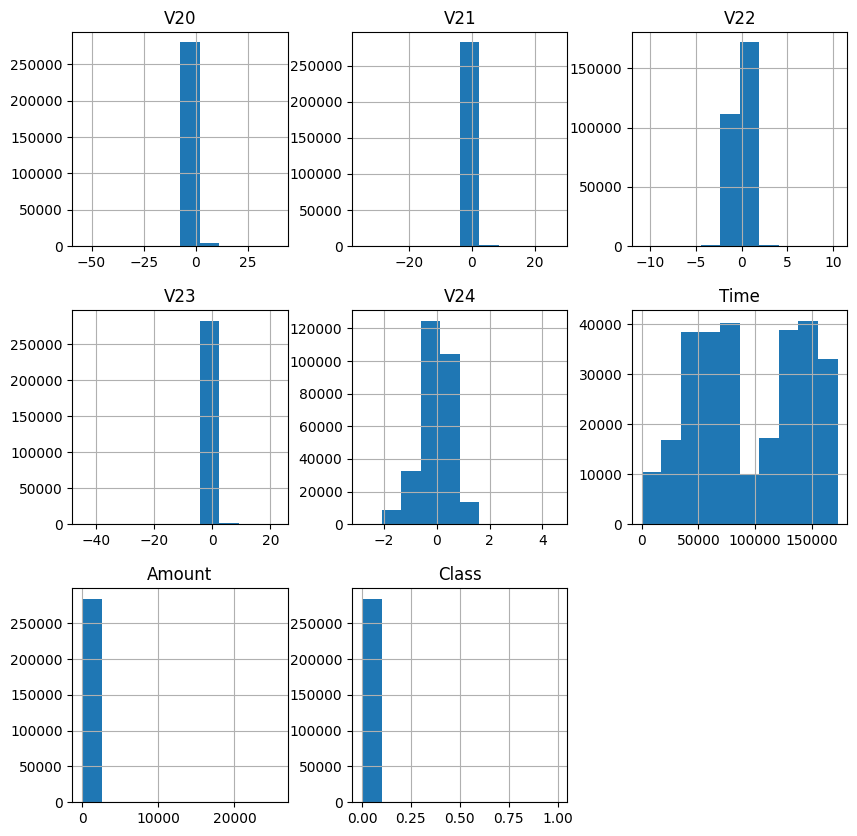

In [15]:
data_df.hist(figsize=(10,10))
plt.show()

## Outlier Fraction

In [16]:
outlier_fraction = len(fraud_data)/float(len(valid_data))

print(outlier_fraction)
print("Fraud Cases : {}".format(len(fraud_data)))
print("Valid Cases : {}".format(len(valid_data)))

0.0017304750013189597
Fraud Cases : 492
Valid Cases : 284315


## Correlation Matrix

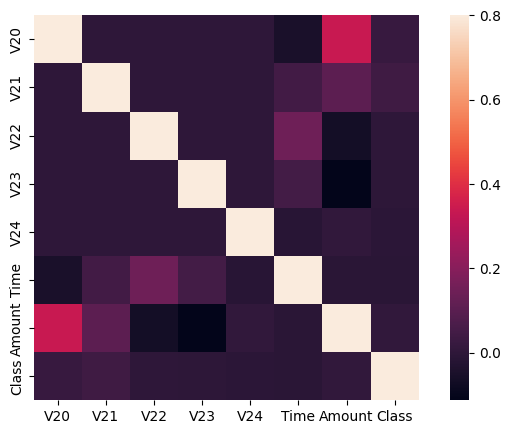

In [17]:
correlation_matrix = data_df.corr()
fig = plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

The correlation matrix presented above demonstrates that there is no significant correlation observed among the V20 to V24 PCA components. However, upon closer examination, it is evident that the 'Class' variable exhibits some positive and negative correlations with the V components. Notably, there is no correlation observed between 'Class' and the 'Time' and 'Amount' variables.

# Model Prediction

In [18]:
def test_stationarity(ts_data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(ts_data, autolag='AIC')
    else:
        adf_test = adfuller(ts_data[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

In [19]:
adf_test_results = {
    col: test_stationarity(data_df, col)
    for col in data_df.columns
}

In [ ]:
adf_test_results

{'V20': 'Stationary',
 'V21': 'Stationary',
 'V22': 'Stationary',
 'V23': 'Stationary',
 'V24': 'Stationary',
 'Time': 'Stationary',
 'Amount': 'Stationary',
 'Class': 'Stationary'}

In [ ]:
data_df.drop(columns=["Amount"], axis=1, inplace=True)
data_df.head()

C:\Users\abhi_\AppData\Local\Temp\ipykernel_23740\1405243787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.drop(columns=["Amount"], axis=1, inplace=True)


,V20,V21,V22,V23,V24,Time,Class
0,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.0,0
1,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.0,0
2,0.524980,0.247998,0.771679,0.909412,-0.689281,1.0,0
3,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,1.0,0
4,0.408542,-0.009431,0.798278,-0.137458,0.141267,2.0,0


In [ ]:
from statsmodels.tsa.api import VAR

max_lag = 100
var_model = VAR(data_df)
lag_results = var_model.select_order(max_lag)
selected_lag = lag_results.aic
print(selected_lag)

75


In [ ]:
def find_anomalies(squared_errors):
    threshold = np.mean(squared_errors) + np.std(squared_errors)
    predictions = (squared_errors >= threshold).astype(int)
    return predictions, threshold

model = VAR(data_df)
var_fitresults = model.fit(selected_lag)
squared_errors = var_fitresults.resid.sum(axis=1) ** 2
predictions, threshold = find_anomalies(squared_errors)

threshold

29.792148662305262

In [ ]:
data_p = data_df.iloc[selected_lag:, :]
data_p['Predictions'] = predictions.values
data_p

C:\Users\abhi_\AppData\Local\Temp\ipykernel_23740\2150620038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_p['Predictions'] = predictions.values


,V20,V21,V22,V23,V24,Time,Class,Predictions
73,-0.298751,-0.042142,-0.148707,0.001451,0.302764,48.0,0,0
74,0.667847,-0.180723,0.235138,-0.091442,0.417654,48.0,0,0
75,-0.128041,-0.024972,0.154264,-0.063147,0.253205,49.0,0,0
76,0.016970,0.115062,0.418529,-0.065133,0.264981,49.0,0,0
77,0.120051,-0.333930,-1.299920,0.084311,-0.370398,49.0,0,0
...,...,...,...,...,...,...,...,...
284802,1.475829,0.213454,0.111864,1.014480,-0.509348,172786.0,0,0
284803,0.059616,0.214205,0.924384,0.012463,-1.016226,172787.0,0,0
284804,0.001396,0.232045,0.578229,-0.037501,0.640134,172788.0,0,0
284805,0.127434,0.265245,0.800049,-0.163298,0.123205,172788.0,0,0


In [ ]:
data_p['Predictions'].value_counts()

Predictions
0    281841
1      2893
Name: count, dtype: int64

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

predictions = var_fitresults.fittedvalues
actual_values = data_df.iloc[selected_lag:, :]

mse = np.mean((predictions - actual_values) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(predictions - actual_values))

# Print the evaluation metrics
print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))
print("Mean Absolute Error (MAE): {:.4f}".format(mae))


Mean Squared Error (MSE): 0.4607
Root Mean Squared Error (RMSE): 0.6787
Mean Absolute Error (MAE): 0.3700


In [ ]:
# Compare Class and Predictions columns for value 1
match_count = sum((data_p['Class'] == 1) & (data_p['Predictions'] == 0))

# Calculate percentage of matching occurrences
match_percentage = (match_count / len(data_p['Class'] == 1)) * 100

print("Number of matching occurrences where Class == 1 and Predictions == 1:", match_count)
print("Percentage of matching occurrences:", match_percentage)

abc = sum(data_p['Predictions'] == 1)

print(match_count/abc)


Number of matching occurrences where Class == 1 and Predictions == 1: 454
Percentage of matching occurrences: 0.1594470628727163
0.15693052194953336
